# Laboratorio #3

In [249]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random

## Parte 1: Numpy

### 1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [7]:
array_1 = np.full((1000, 1), True)

In [8]:
print(array_1.dtype)

bool


In [10]:
print("Array bytes: ", array_1.size*array_1.itemsize)

Array bytes:  1000


### 2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.


In [17]:
array_2 = np.arange(100,1,-1)
array_2 = array_2[array_2%2==0]
print(array_2[-10:])

[20 18 16 14 12 10  8  6  4  2]


### 3. Dado el array<br>
[2 4 5 6<br>
0 3 7 4<br>
8 8 5 2<br>
1 5 6 1]<br>

<br>
Seleccione con una instrucción el subarray de elementos [0 3 7 4]
<br>
Después, seleccione el subarray de elementos<br>
[
2 5<br>
8 5]

In [34]:
array_3 = np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])
array_3_1 = np.array([0,3,7,4])
array_3_2 = np.array([[2,5],[8,5]])

In [35]:
array_3[1]

array([0, 3, 7, 4])

In [69]:
array_3[[0,2], :][:, [0,2]] 

array([[2, 5],
       [8, 5]])

### 4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [72]:
a = np.array([1,4,2,7])
b = np.array([1,3,2,9])

np.mean(a-b)

### 5. Tengo valores de cordenadas (x, y) en las columnas del array
1.33 4.5 <br>
30.0 10.7 <br>
70.2 0.5 <br>

Agregue a este array las coordenadas (37.1, -3.6).
Muestre en pantalla las dimensiones del nuevo
array.

In [102]:
array_5 = np.array([[1.33,4.5], [30.0, 10.7],[70.2,0.5]])

In [103]:
array_5.shape

(3, 2)

In [104]:
new_row_5 = [[37.1,-3.6]]

In [105]:
array_5_1 = np.append(array_5,new_row_5, axis=0)

In [106]:
array_5_1.shape

(4, 2)

### 6. Copie el array del ejercicio anterior. Traspóngalo (.Agregue ahora dos nuevos pares de coordenadas: (10.8,3.0) y (35.8, 12.0).

In [119]:
array_6 = array_5.copy()

In [120]:
array_6_t = array_6.transpose()

In [121]:
new_row_6 = np.array([[10.8,3.0],[35.8,12.0]])

In [122]:
array_6_t_2 = np.append(array_6_t,new_row_6.transpose(),axis=1)

In [123]:
array_6_t_2

array([[ 1.33, 30.  , 70.2 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 ,  3.  , 12.  ]])

## Parte 2: Exploración y Minería de Datos

In [124]:
data = pd.read_csv('./data/NucleosPoblacion.csv')

In [125]:
data.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


### 1. ¿Cuántos Municipios tienen más de 100000 habitantes?

In [128]:
data.loc[data['Poblacion'] > 100000]['Municipio'].nunique()

62

### 2. Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayo y responda:

In [186]:
df_plot_2 = data[['Poblacion','Provincia']].groupby('Provincia').sum().sort_values('Poblacion', ascending=True).reset_index()

In [187]:
df_plot_2

,Provincia,Poblacion
0,Soria,39838.0
1,Teruel,51532.0
2,Segovia,55748.0
3,Ávila,58245.0
4,Cuenca,71921.0
5,Melilla,76034.0
6,Ceuta,80579.0
7,Palencia,82169.0
8,Zamora,85098.0
9,Huesca,124838.0


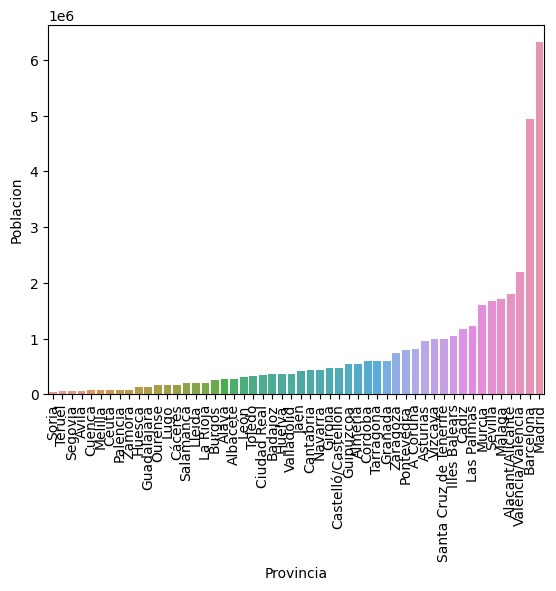

In [191]:
sns.barplot(data=df_plot_2, x="Provincia", y="Poblacion",estimator=np.sum, errorbar=None)
plt.xticks(rotation=90)
plt.show()

#### a. ¿Cuál es la segunda ciudad más poblada?

In [140]:
data.iloc[data['Poblacion'].nlargest(2).index].tail(1)

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
623,623,624,Barcelona,1619337.0,8019,Barcelona,8,Barcelona,2.176349,41.384247


In [347]:
df_plot_2.iloc[df_plot_2['Poblacion'].nlargest(2).index].tail(1)

,Provincia,Poblacion
50,Barcelona,4934795.0


####  b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [348]:
df_plot_3 = data[['Poblacion','Provincia']].groupby('Provincia').sum().sort_values('Poblacion', ascending=False).reset_index()

In [351]:
df_plot_3.loc[df_plot_3['Provincia'] == 'Granada']

,Provincia,Poblacion
16,Granada,604357.0


### 3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

Según https://es.wikipedia.org/wiki/Anexo:Municipios_de_Extremadura Extremadura está formada por dos provincias, la provincia de Badajoz y la de Cáceres.

In [210]:
data.loc[ (data['Provincia'].isin(['Badajoz','Cáceres']) ) ].loc[ data['Poblacion'] > 5000]['Municipio'].nunique()

14

### 4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [214]:
data.iloc[data['Y'].nlargest(1).index]['Municipio']

104    Viveiro
Name: Municipio, dtype: object

### 5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [223]:
data.loc[data['Provincia']=='Granada'].groupby('Provincia')['Poblacion'].describe()

,count,mean,std,min,25%,50%,75%,max
Provincia,,,,,,,,
Granada,20.0,30217.85,50355.491715,10386.0,13146.5,17526.0,21739.75,239154.0


### 6. Realice un histograma con la población de los Municipios para cada una de las provincias.

In [238]:
df_plot_6 = data[['Poblacion','Provincia']].groupby('Provincia').sum().reset_index()

In [239]:
df_plot_6

,Provincia,Poblacion
0,A Coruña,818982.0
1,Alacant/Alicante,1804252.0
2,Albacete,280673.0
3,Almería,550604.0
4,Asturias,965777.0
5,Badajoz,361700.0
6,Barcelona,4934795.0
7,Burgos,250766.0
8,Cantabria,437448.0
9,Castelló/Castellón,476388.0


<Axes: xlabel='Poblacion', ylabel='Count'>

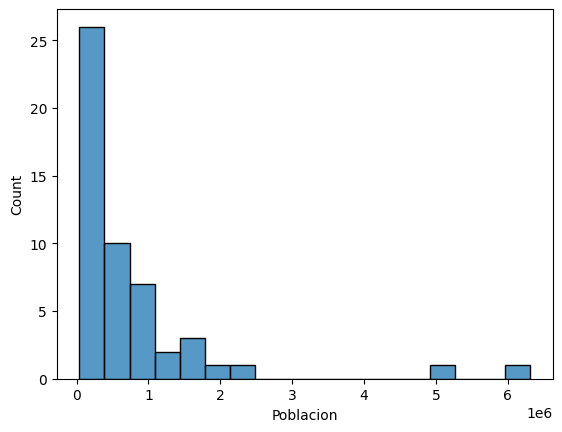

In [243]:
sns.histplot(data=df_plot_6, x='Poblacion')

### 7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [253]:
municipios = random.choices((data['Municipio'].unique()),k=50)

In [255]:
municipios

['Jerez de la Frontera',
 'Totana',
 'Santanyí',
 'Argentona',
 'Córdoba',
 'El Astillero',
 'Xirivella',
 'Puerto Real',
 'Boadilla del Monte',
 'El Astillero',
 'Miranda de Ebro',
 'Calp',
 'Icod de los Vinos',
 'Mutxamel',
 'San Vicente del Raspeig/Sant Vicent del Raspeig',
 'Martorell',
 'Mislata',
 'El Campello',
 'Alhaurín de la Torre',
 'Fuensalida',
 'La Solana',
 'Arrecife',
 'Oleiros',
 'Puerto Real',
 'Los Alcázares',
 'San Miguel de Abona',
 'Tomiño',
 'Écija',
 'Alcalá del Río',
 'Astorga',
 'Ávila',
 'Ciempozuelos',
 'Torrevieja',
 'Albolote',
 'Pego',
 'Marín',
 'Elda',
 "L'Eliana",
 'Santa Fe',
 'Sax',
 'Ciempozuelos',
 'Las Rozas de Madrid',
 'Tomares',
 'Cangas',
 'Huesca',
 'Valdemoro',
 'O Carballiño',
 'Níjar',
 'Carballo',
 'La Puebla del Río']

In [260]:
data.loc[ (data['Municipio'].isin(municipios))]['Poblacion'].mean()

39699.17647058824

In [261]:
data.loc[ (data['Municipio'].isin(municipios))]['Poblacion'].std()

52113.24179158532

### 8. Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [299]:
x_madrid, y_madrid = data.loc[ data['Municipio'] == 'Madrid']['X'], data.loc[ data['Municipio'] == 'Madrid']['Y']

In [300]:
x_madrid

355   -3.703797
Name: X, dtype: float64

In [301]:
y_madrid

355    40.41663
Name: Y, dtype: float64

In [340]:
data_madrid = data.loc[ data['Municipio'] != 'Madrid'].reset_index(drop=True)

In [341]:
data_madrid['dif_madrid_x'] = data_madrid['X'] - float(x_madrid)
data_madrid['dif_madrid_y'] = data_madrid['Y'] - float(y_madrid)

In [342]:
data_madrid['dist'] = np.sqrt(data_madrid['dif_madrid_x']**2 + data_madrid['dif_madrid_y']**2 )

In [343]:
data_madrid.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,dif_madrid_x,dif_madrid_y,dist
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542,-11.742215,-12.516088,17.161937
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966,-10.309504,-11.997664,15.818654
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649,-9.847654,-11.455981,15.106812
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496,-11.817714,-12.299134,17.056584
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873,-11.950314,-12.272757,17.129815


In [344]:
print("Municipio más cercano")
data_madrid.iloc[data_madrid['dist'].nsmallest(1).index]

Municipio más cercano


,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,dif_madrid_x,dif_madrid_y,dist
782,783,784,Humera-Somosaguas-prado del Rey,14800.0,28115,Pozuelo de Alarcón,28,Madrid,-3.783853,40.428764,-0.080055,0.012134,0.08097


In [345]:
print("Municipio más lejano")
data_madrid.iloc[data_madrid['dist'].nlargest(1).index]

Municipio más lejano


,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y,dif_madrid_x,dif_madrid_y,dist
29,29,30,Los Llanos de Aridane,20948.0,38024,Los Llanos de Aridane,38,Santa Cruz de Tenerife,-17.914361,28.658639,-14.210564,-11.757991,18.444254
